# Подготовка модели в production

In [1]:
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from joblib import dump, load


X, y = load_diabetes(return_X_y=True)

pipe = Pipeline([  
  ('Scaling', MinMaxScaler()),
  ('FeatureSelection', SelectKBest(f_regression, k=5)),
  ('Linear', LinearRegression())
  ])


pipe.fit(X, y)
pipe.predict(X[1:2])
s1 = pickle.dumps(pipe)
pipe_from_bytes = pickle.loads(s1)

print(all(pipe.predict(X) == pipe_from_bytes.predict(X)))

True


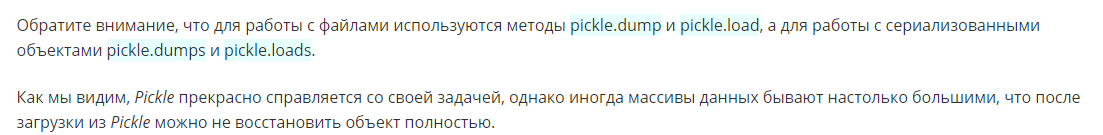

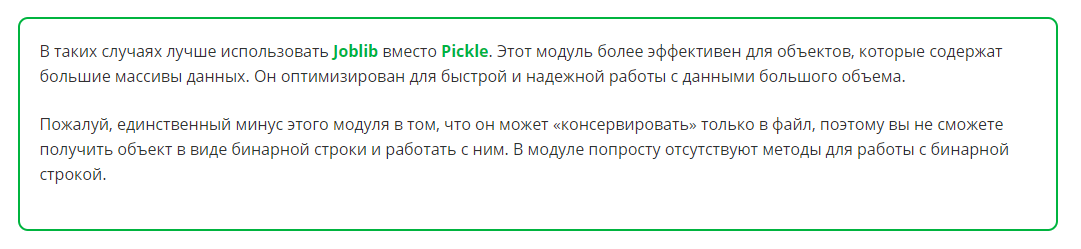

In [2]:
# Для иллюстрации работы сохраним обученную модель:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
regressor = LinearRegression()
regressor.fit(X, y)

# …и загрузим его заново:
from joblib import dump, load
dump(regressor, 'regr.joblib')

clf_from_jobliv = load('regr.joblib') 
all(regressor.predict(X) == clf_from_jobliv.predict(X))

True

# Практика: Pickle

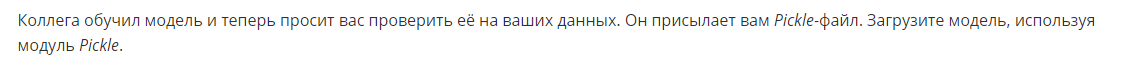

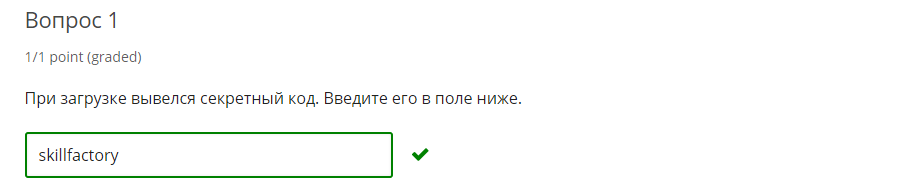

In [13]:
with open('hw1.pkl', 'rb') as pkl_file:
    p1 = pickle.load(pkl_file)

secret word: skillfactory
how is this possible? answer is here: https://youtu.be/xm-A-h9QkXg


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearRegression from version 0.22.2.post1 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


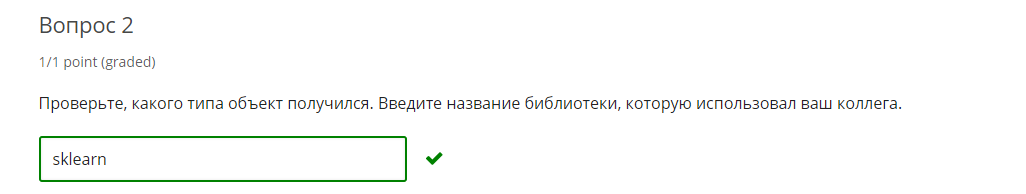

In [5]:
type(p1)

sklearn.linear_model._base.LinearRegression

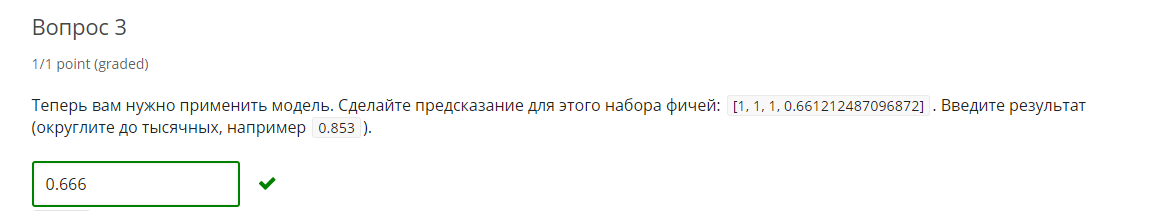

In [10]:
p1.predict([[1, 1, 1, 0.661212487096872]])

array([0.666])

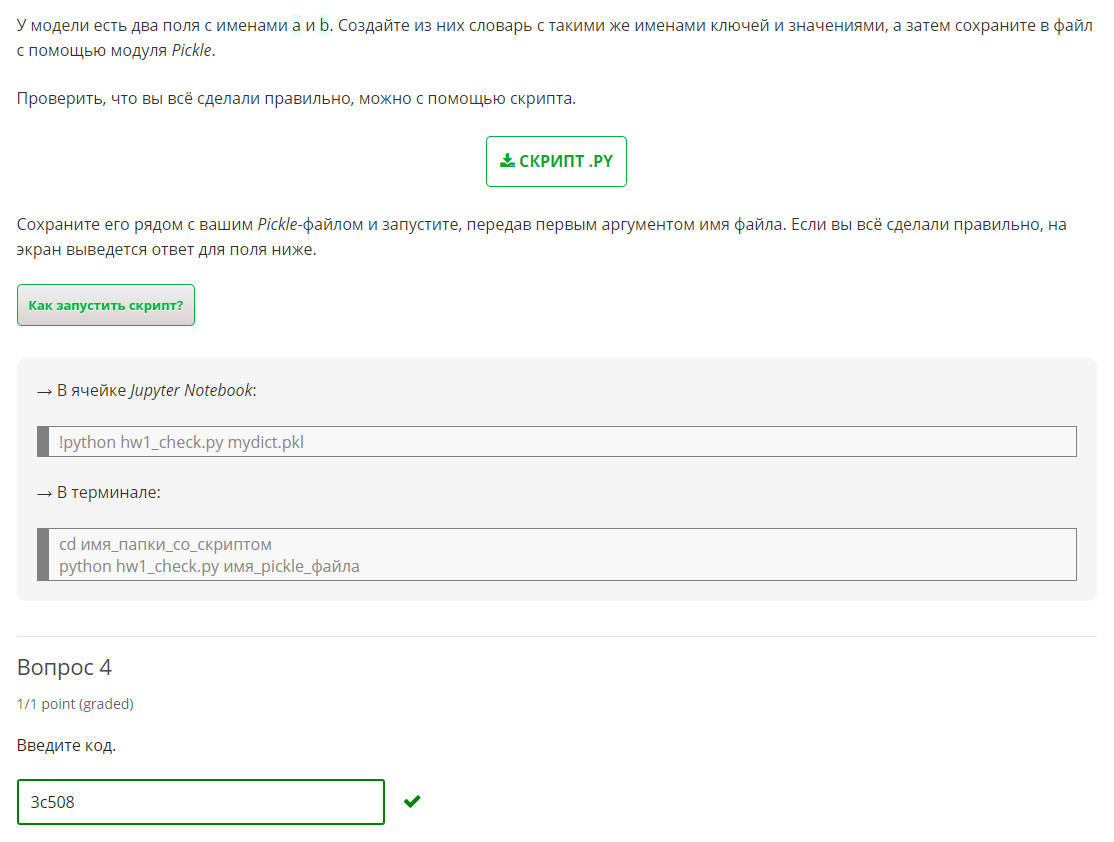

In [14]:
p1.a

5

In [15]:
p1.b

13

In [19]:
mydict = {
  "a": p1.a,
  "b": p1.b
}

In [22]:
with open('hw2.pkl', 'wb') as pkl_file:
    p1 = pickle.dump(mydict,pkl_file)

In [27]:
!python C:\Users\snkna\Downloads\hw1_check_ol.py hw2.pkl


('secret code 2:', '3c508')


# Форматы PMML и ONNX-ML

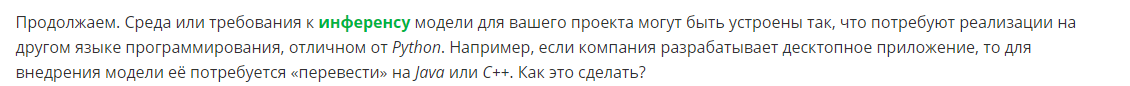

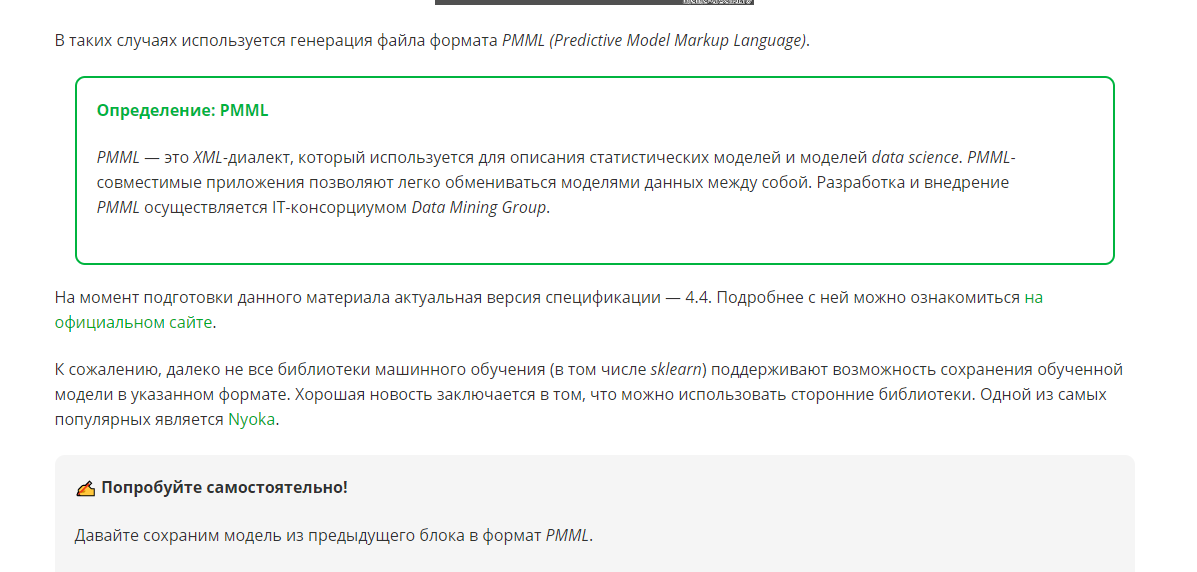

In [28]:
!pip3 install --upgrade nyoka


In [29]:
from nyoka import skl_to_pmml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
cols = load_diabetes()['feature_names']

scaler = MinMaxScaler()
pipe = Pipeline([  
            ('Scaling', MinMaxScaler()),
            ('Linear', LinearRegression())
        ])
# Тренировка пайплайна, включающего линейную модель и нормализацию признаков
pipe.fit(X, y)
# Сохраним пайплайн в формате pmml в файл pipe.pmml
skl_to_pmml(pipeline=pipe, col_names=cols, pmml_f_name="pipe.pmml")

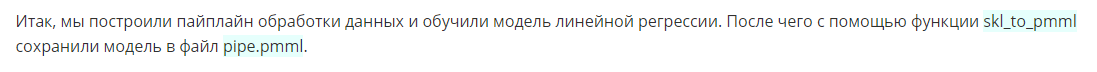

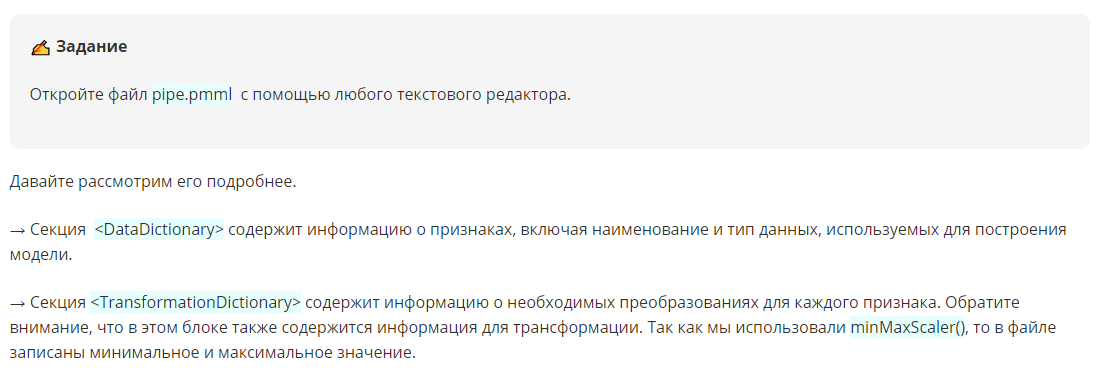

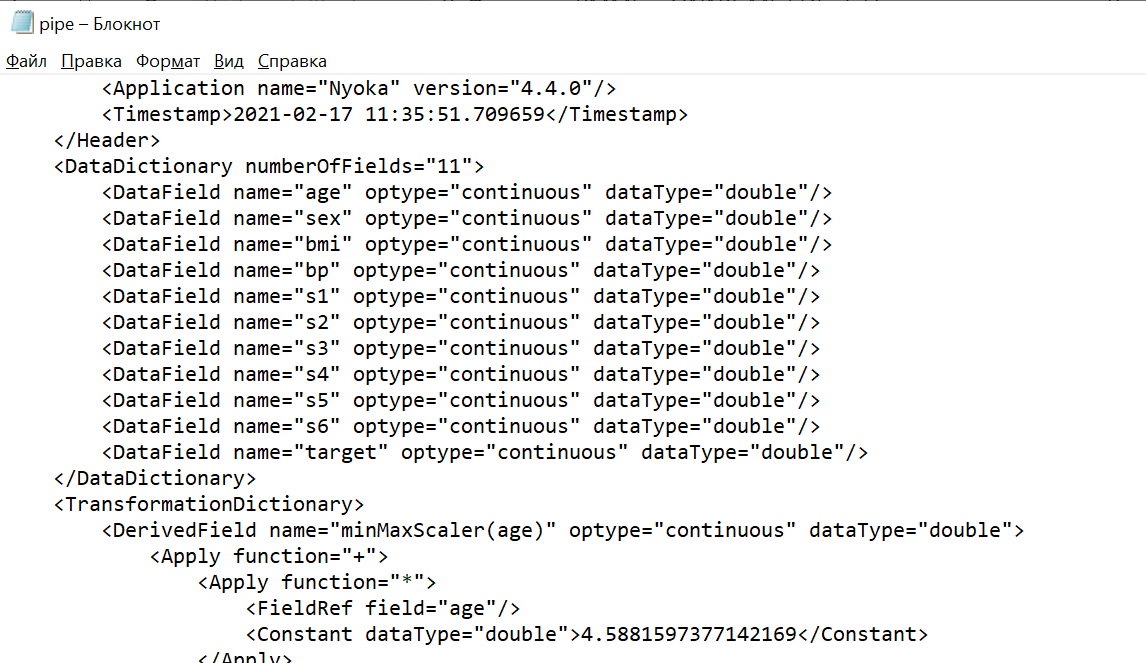

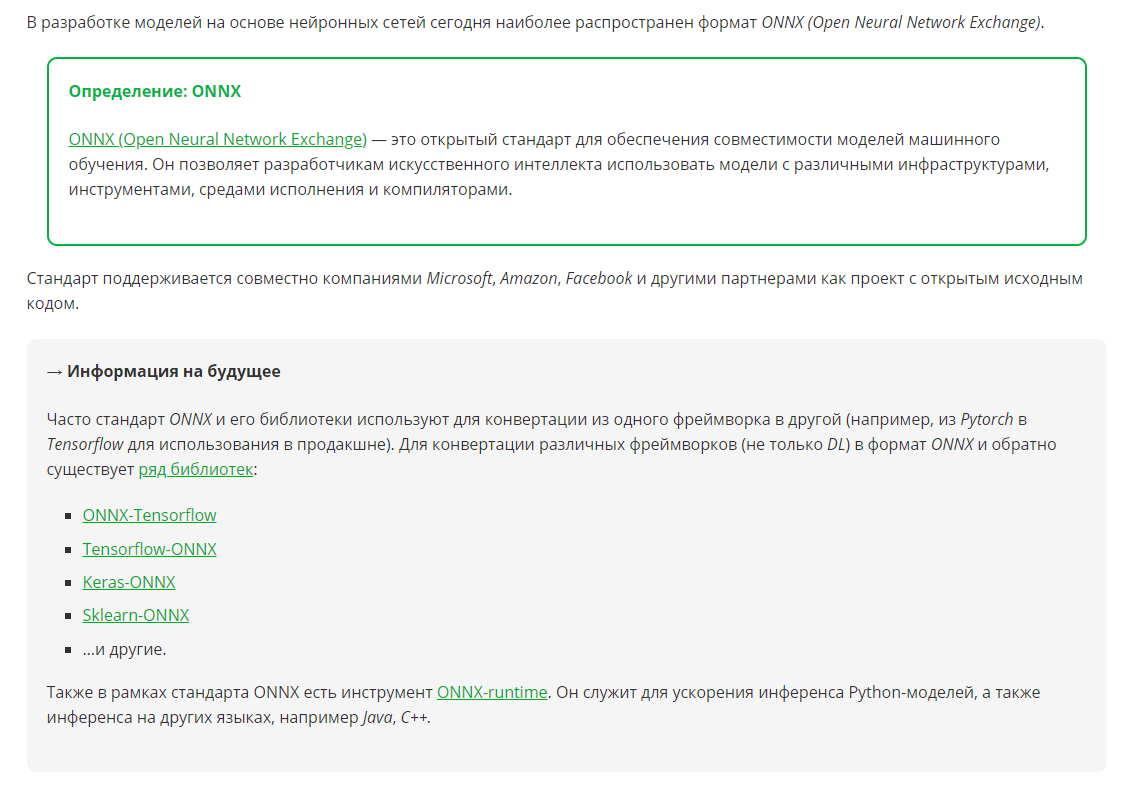

In [37]:
!pip install skl2onnx

In [1]:
import onnxruntime as rt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import numpy as np

X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(X_train.shape, X_test.shape)

# обучаем модель
model = LinearRegression()
model.fit(X_train, y_train)

# делаем инференс моделью на тесте
test_pred = model.predict(X_test)
print('sklearn model predict:\n', test_pred)

# конвертируем модель в onnx формат
initial_type = [('float_input', FloatTensorType([None, 13]))]
model_onnx = convert_sklearn(model, initial_types=initial_type)

# сохраняем модель в файл
with open("model.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

# Делаем инференс на тесте через onnxruntime
sess = rt.InferenceSession("model.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
test_pred_onnx = sess.run([label_name],{input_name:  X_test.astype(np.float32)})[0].reshape(-1)
print('onnx model predict:\n',test_pred_onnx) 

(379, 13) (127, 13)
sklearn model predict:
 [23.1903541  18.97985889 19.82548836 19.00126197  4.39524325 11.90230303
 21.24870187 28.64449553 29.03550064 13.90644782  6.41422339 32.65356658
 18.99884691 20.01569489 37.15275422 22.80485488 29.04529555 33.04200949
 10.48602033 24.45472284 21.33069324 27.60222354 37.52118276 13.6113556
  9.56442243 15.03368415 35.5975585  26.01017573 25.52430154 27.06321433
 19.07680237 30.54746571 31.27561168 16.40132981 39.76707419 20.27263903
 18.94934061 17.12210014 21.6262832  28.15101424 26.95292863 19.14352801
 14.50664721 25.78075705 18.50460146 13.93439214 24.96593139 19.12431756
 20.6780475   6.23807397 27.71460362 26.74617711 11.83361779 40.10855118
 14.66523328 22.12023896 20.34305401 20.3786179  23.56685605 21.91582872
 20.79748126 35.43123681 17.32592458 20.92077502 24.1674162  43.38199388
 19.59747681 20.11624895 22.35462757 28.12506906 25.53832602 12.88949504
 13.1552648  33.3092473  26.12666965 22.54135443 12.14404271 16.61972119
 28.5270

In [5]:
 X_test.astype(np.float32).shape

(127, 13)

In [3]:
X_test

array([[3.84970e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.91340e+02, 1.32700e+01],
       [3.04100e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.94810e+02, 1.05600e+01],
       [2.41030e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 1.27900e+01],
       ...,
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [3.35900e-02, 7.50000e+01, 2.95000e+00, ..., 1.83000e+01,
        3.95620e+02, 1.98000e+00],
       [1.64390e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
        3.74710e+02, 9.52000e+00]])

# Что такое воспроизводимость?

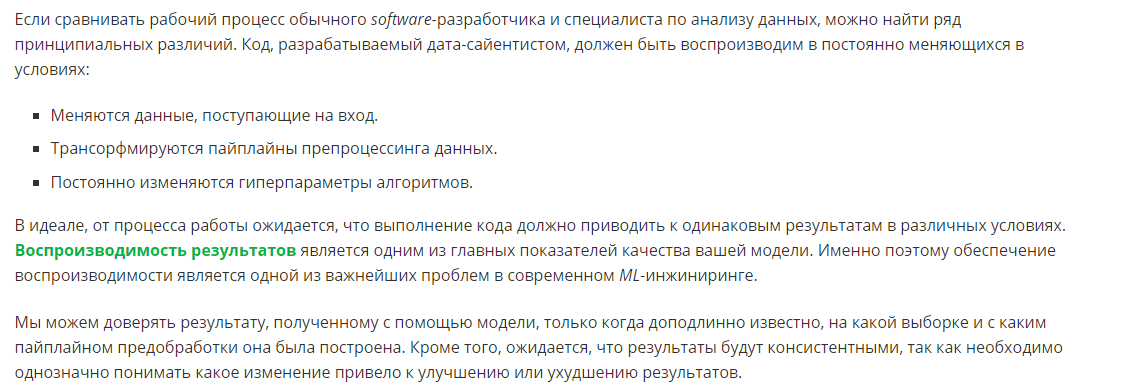

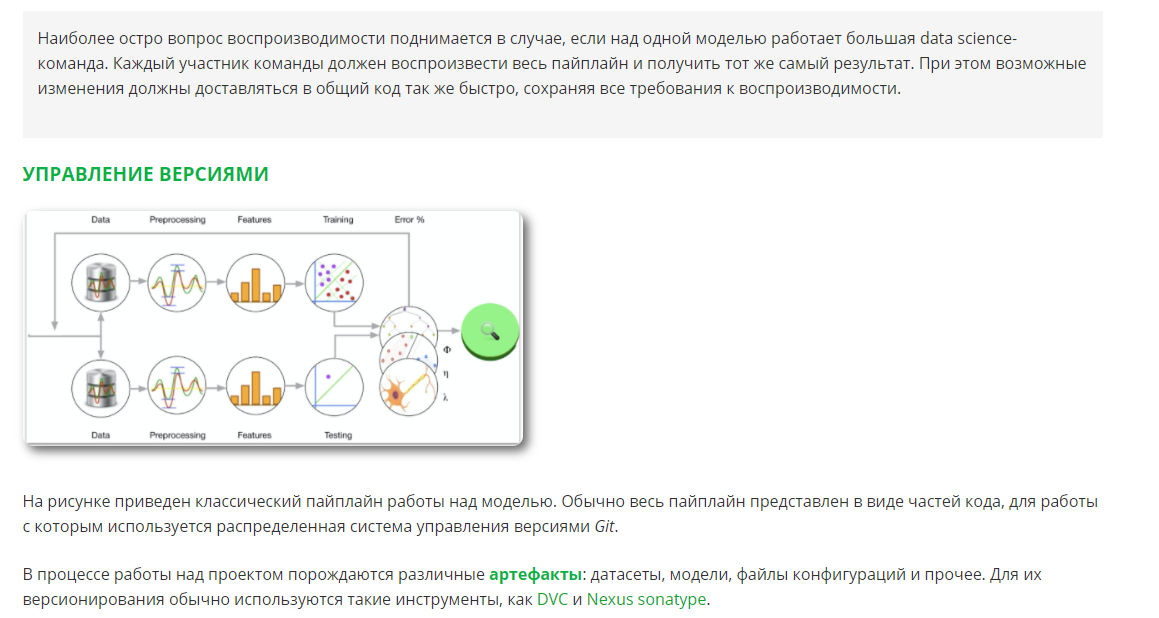

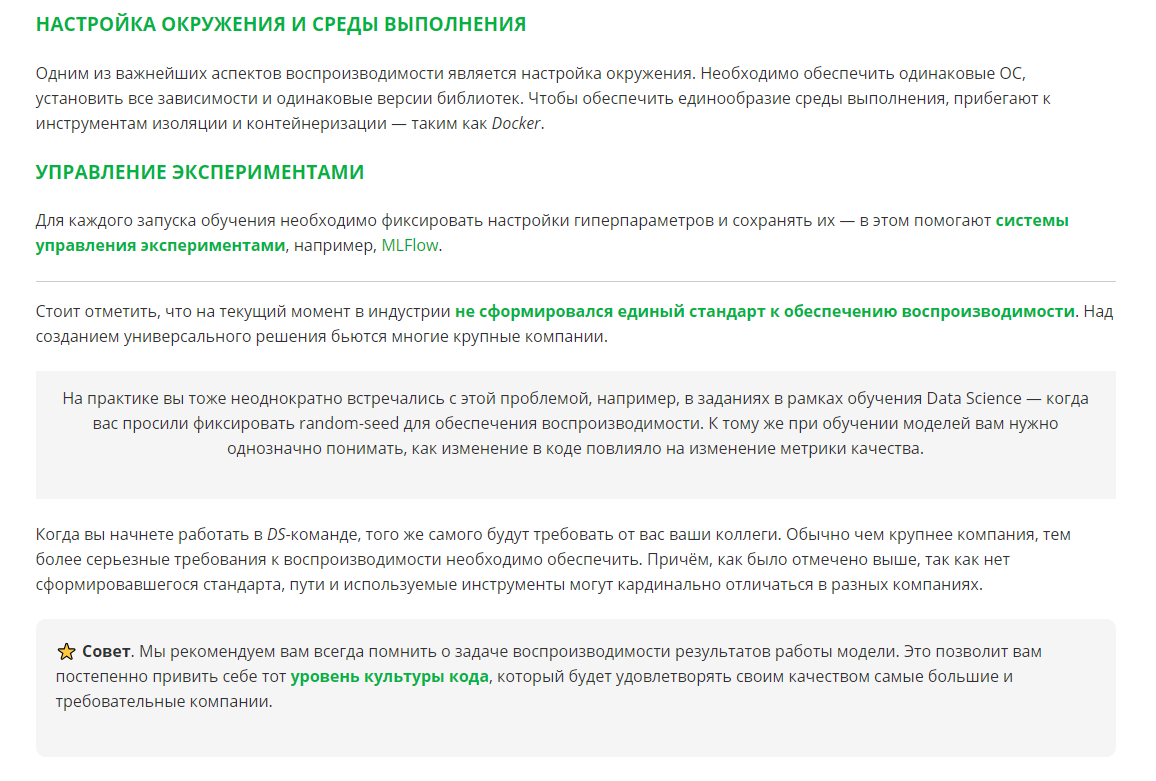

# Офлайн- и онлайн-модели

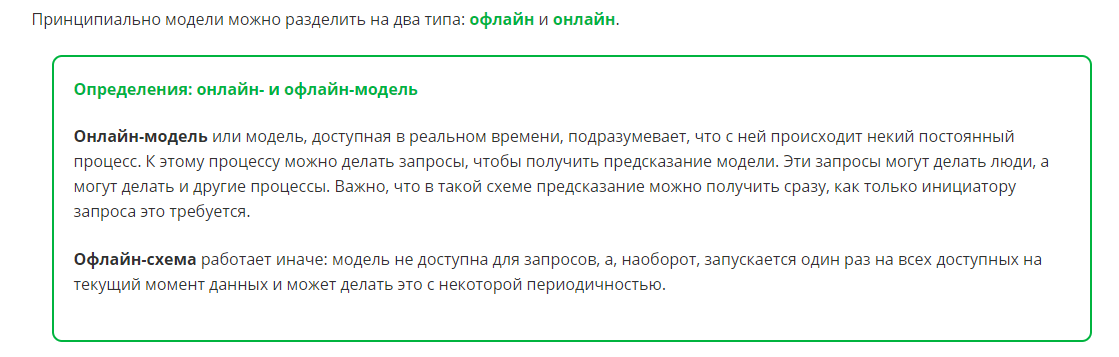

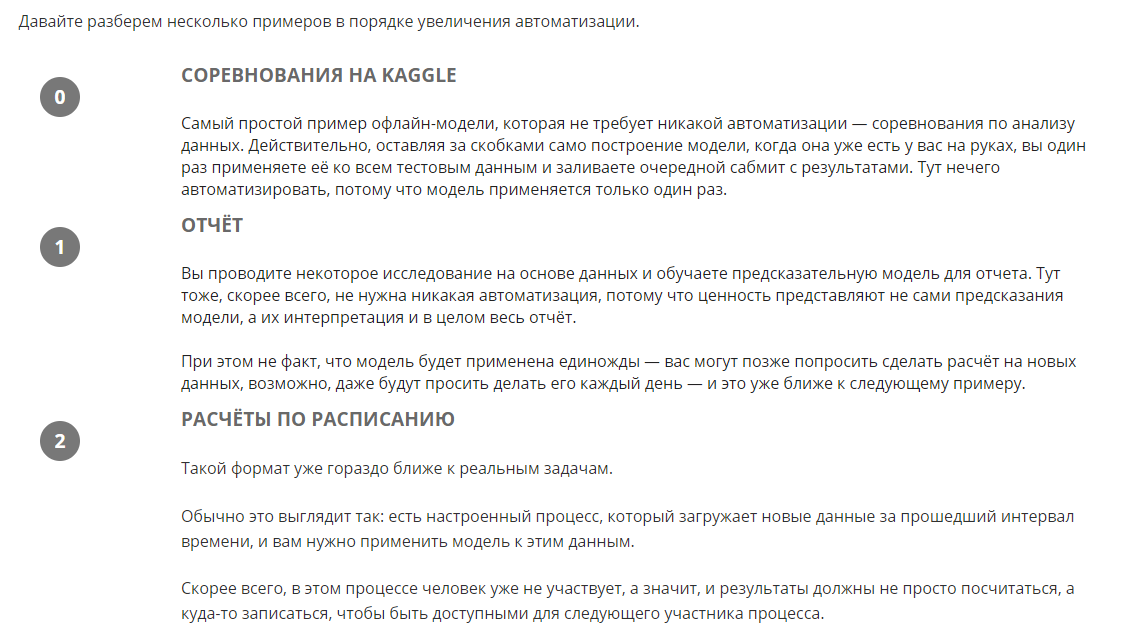

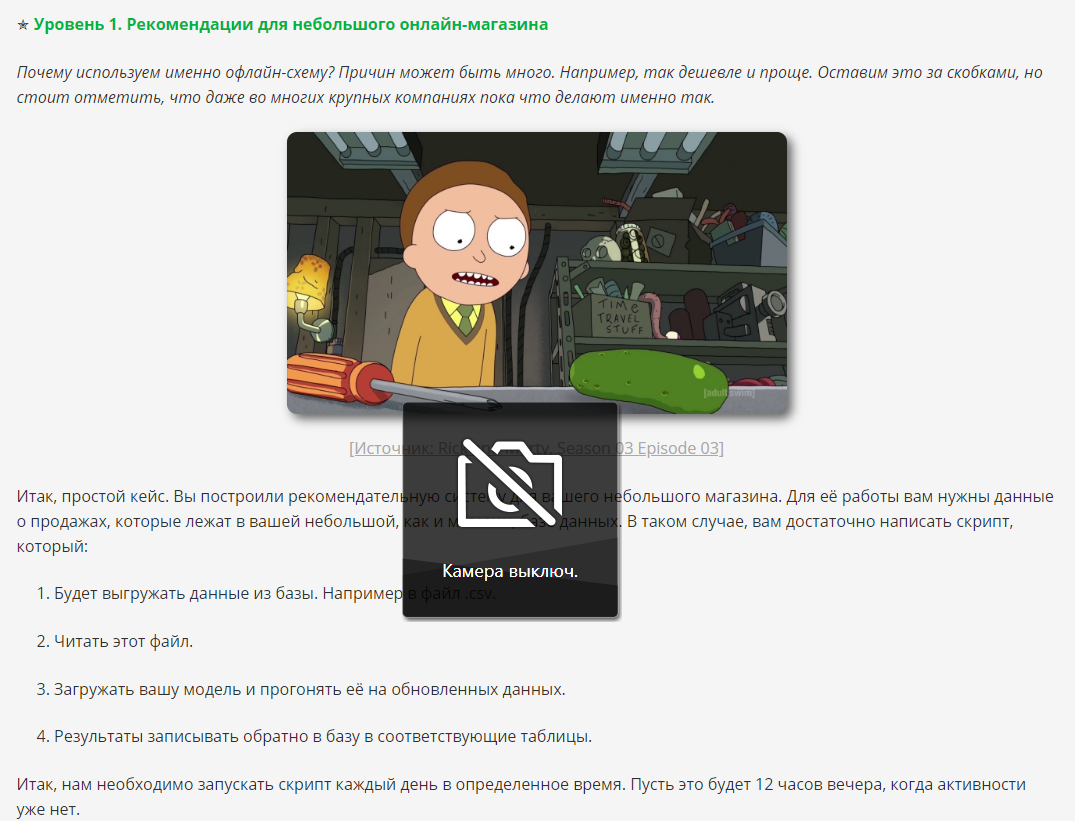

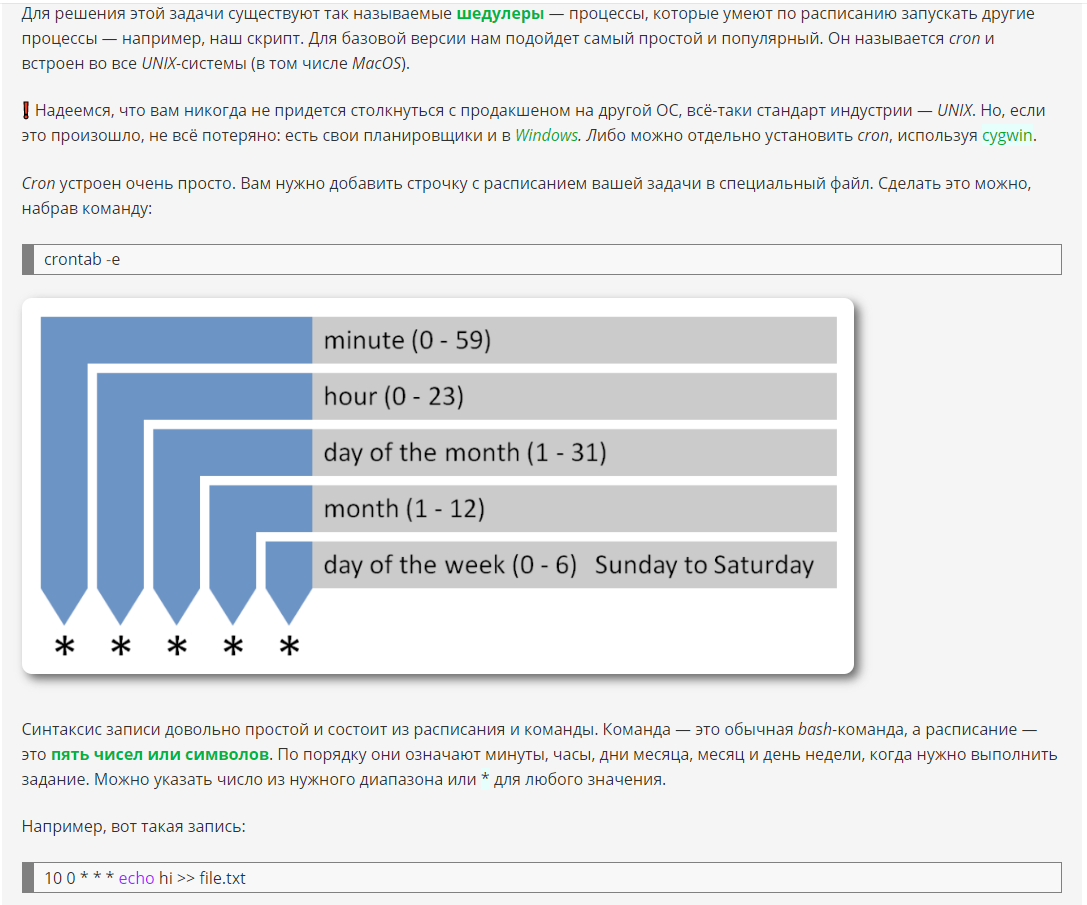

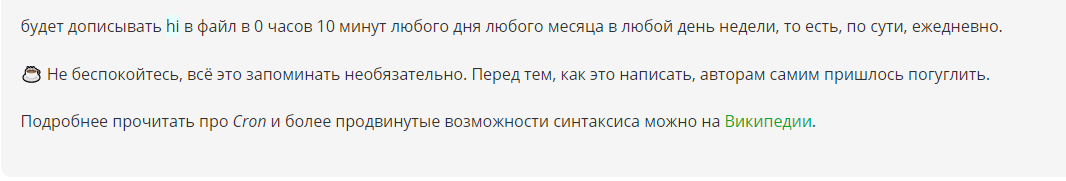

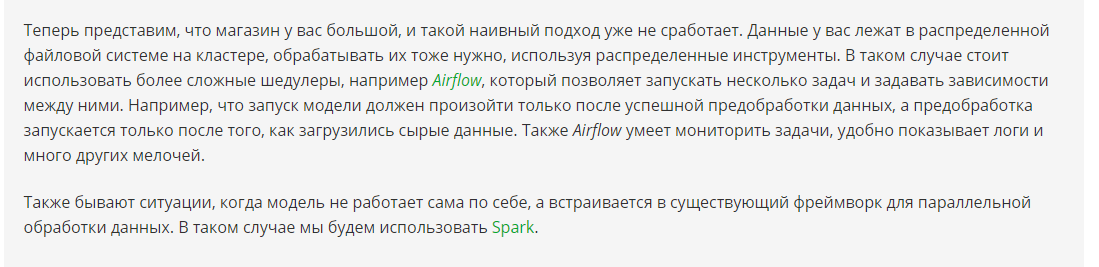

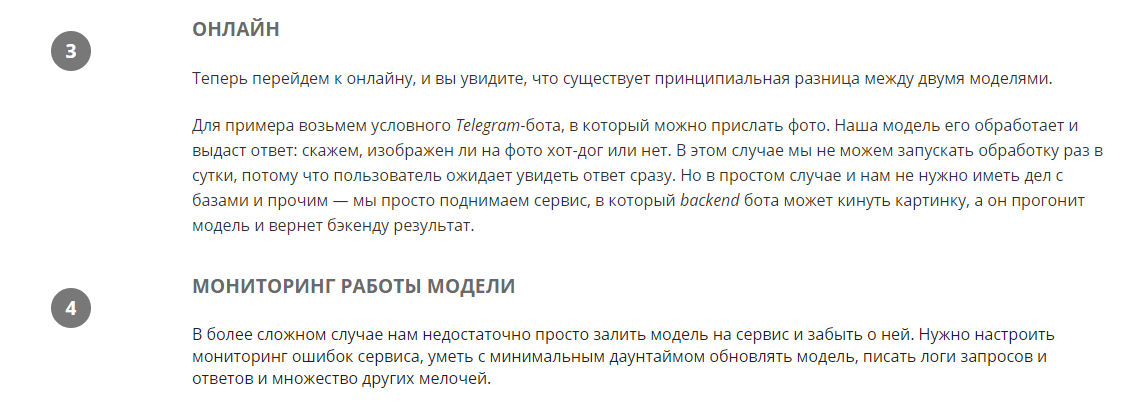

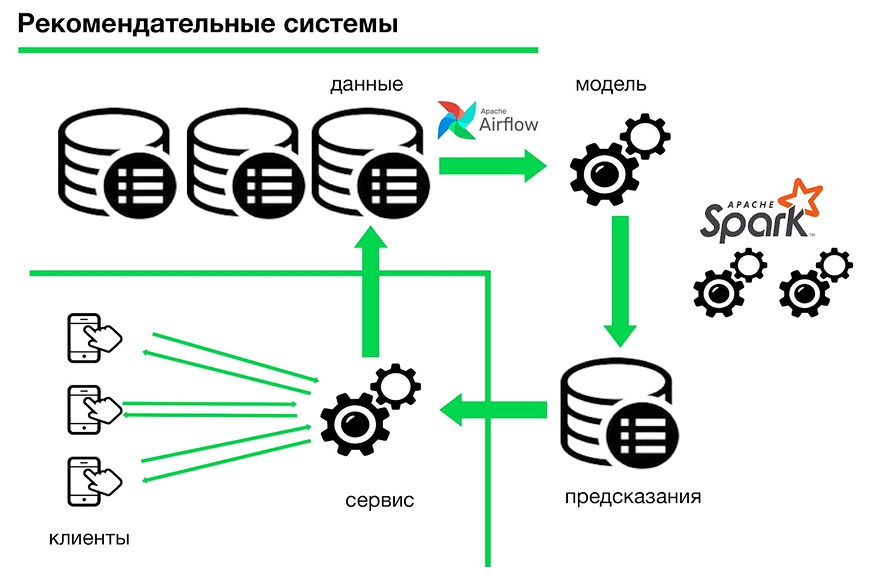